# Lista de exercícios 02

In [4]:
import numpy as np
import math
from vpi.io import read_gray_image, display_image
from vpi.filters import convolve, normalize

# Questões

Os exercicios abaixo foram baseados nos slides http://www.cs.toronto.edu/~kyros/courses/320/Lectures.2013s/lecture.2013s.09.pdf

<p> 
    <strong> 1.) </strong> Implemente a função <strong>create_gauss_kernel</strong> que recebe um valor de sigma
($\sigma$) e retorna o kernel raio $4 \sigma$ ($8 \sigma + 1$ de tamanho) para convolução 1D da função de gauss dada por $G_{\sigma}(x) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2}{2\sigma^2}}$ normalizado, ou seja, a função devolve o kernel $k = \frac{G_{\sigma}(x)}{A} $, onde $A = \sum_x G_{\sigma}(x)$, Retorne um kernel bidimensional onde a dimensão(shape) é $(1, 2\sigma + 1)$
</p>

In [5]:
def create_gauss_kernel(sigma):
    kernel = np.arange(-2*sigma, 2*sigma)
    for i in range(g.size):
        kernel[i] = (math.exp((-kernel[i]**2)/2*(sigma**2))/2*math.pi*(sigma**2)
    return kernel

<p> 
    <strong>2.)</strong> Implemente a função <strong>gauss</strong> que recebe uma imagem $f$ e um parâmetro sigma ($\sigma$) que representa o desvio padrão e devolve a imagem $f$ após a convolução pela a matriz Gaussiana. Além disso implemente a função utilizando a própriedade da <strong>associatividade</strong> (http://adessowiki.fee.unicamp.br/adesso-1/wiki/master/tutorial_convprop_3/view/, faça login no adessowiki ante de acessar o link), ou seja, utilizando a decomposição, seja $g$ a imagem filtrada pela matriz Gaussiana, então:
    
    $$ g = f \bigotimes G_{\sigma} \bigotimes G_{\sigma}^T $$

Onde:
<ul>
    <li>$f \bigotimes k$ significa a aplicação da convolução da imagem $f$ pelo kernel $k$. </li>
    <li>$G_{\sigma}$ é o kernel 1D gerado pela função <strong>create_gauss_kernel</strong></li>
    <li>$G_{\sigma}^T$ é a transposta do kernel 1D gerado pela função <strong>create_gauss_kernel</strong></li>
</ul>
</p>
<p>
Obs.: Utilize a função <strong>convolve</strong> do pacote <strong>vpi.filters</strong> para a realização da convolução.
</p>

In [6]:
def gauss(f, sigma=1):
    g = create_gauss_kernel(sigma)
    h = convolve(convolve(f,kernel), np.transpose(g))
    return h

<p> 
    <strong>3) </strong> Implemente uma função <strong>image_reduce</strong> que reduz a imagem pela metade atravez da operação resample. A função image_reduce deve executar o filtro gaussiano implementado no exercício anterior com $\sigma$(sigma) $= 1$ e gerar uma imagem utilizando resample, ou seja, pegue um pixel sim outro não (veja slides de referência).
</p>

In [7]:
def image_reduce(f):
    g = gauss(f, 1)
    g = g[::2, ::2]
    return g

<p>
    <strong>4) </strong> Implemente a função <strong>image_expand</strong> que expande a imagem por um fator 2 (dobra o tamanho), por meio da seguintes operações:
    <ul>
        <li> crie uma imagem $g$ com o dobro do tamanho </li>
        <li> Atribua o valor de $f$ em $g$ em todos os pixels que têm indice par ($\forall (x,y) \in R, g(2x,2y) = f(x,y)$, onde $R$ é o dominio da imagem $f$.</li>
        <li>Rode o filtro gaussiano com $\sigma = 1$ e multiplique por $4$, ou seja, o resultado final $h$, será $h = 4*gauss(g, 1)$</li>
        <li>Retorne $h$ </li>
    </ul>
    
    A ideia do método é para cada pixel $p$ de $f$, gere novos pixels em $g$ mesclando o valor de $p$ com seus vizinhos por meio de uma gaussiana para suavizar a contribuição dos valores mais distântes de $p$ em $f$. Para mais detalhes consulte os slides usados com referência.
</p>

In [8]:
def image_expand(f):
    g = np.zeros((2*f.shape[0], 2*f.shape[1]))
    g[::2, ::2] = f
    h = 4*gauss(g, 1)
    return h

<p>
    <strong>5) </strong> Implemente a função <strong>make_gaussian_pyramid</strong> que recebe uma imagem $f$ e a quantidade de niveis da pirâmide $levels$ e devolve a pirâmide gaussiana, onde o primeiro nível á a imagem $f$ e os níveis subsequentes é a redução do nível anterior.
</p>

In [9]:
def make_gaussian_pyramid(f, levels):
    g = f.copy()
    pyramid = np.array(levels)
    for i in range(levels):
        g = gauss(g, 2*i)
        g = image_reduce(g)
        pyramid[i] = g
    return pyramid 

<p>
    <strong>6) </strong> Implemente a função <strong>make_laplacian_pyramid</strong> que recebe uma pirâmide gaussiana retornada pela função do exercício anterior $gauss\_pyramid$ e gera uma pirâmide laplaciana. Onde cada nível $L_n$ é dado por $L_n = g_{n} - image\_expand(g_{n+1})$, onde $g_n$ é o nível $n$ da pirâmide gaussiana e $image\_expand$ e a função implementada pela função $image\_expand$ no exercício $4$.
</p>

In [10]:
def make_laplacian_pyramid(gauss_pyramid):
    pass

<p>
    <strong>7) </strong> Implemente a função <strong>make_pyramid_blending</strong>, que recebe duas piramides laplacianas referente as imagens que serão mescladas:
    <ul>
        <li><strong>laplacian_pyramid_white</strong>: pirâmide laplaciana da imagem a ser mesclada que utiliza os pixels brancos da imagem de mascara</li>
        <li><strong>laplacian_pyramid_black</strong>: pirâmide laplaciana da imagem a ser mesclada que utiliza os pixels pretos da imagem de mascara</li>
        </ul>
        
    E uma pirâmide gaussiana de uma imagem binária de máscara <strong>gaussian_pyramid_mask</strong>, que demarca quais regiões da imagens a serem mescladas devem ser utilizados. A função make_pyramid_blended deve retornar um vetor onde cada posição i é dada por:
    $$ B_i = gm_i * lw_i + (1-gm_i) * lb_i  $$
    
Onde
<ul>
    <li>$gm_i$ é gaussian_pyramid_mask no nível $i$</li>
    <li>$lw_i$ é laplacian_pyramid_white no nível $i$</li>
    <li>$lb_i$ é laplacian_pyramid_black no nível $i$</li>
    <li>$B_i$ é a piramide de mesclagem (pyramid_blending) no nível $i$</li>
</ul>

Retorne a pirâmide de mesclagem $B$.
</p>




In [11]:
def make_pyramid_blending(laplacian_pyramid_white, laplacian_pyramid_black, gaussian_pyramid_mask):
    pass

<p>
    <strong>8) </strong> Implemente a função <strong>collapse</strong> que dada uma pirâmide de mesclagem reconstroi a imagem mesclada relizando a seguinte operação:
    $$     
    R_n = 
    \begin{cases}
    B_n + B_{n+1}, &\text{if   } n = |B|-1 \\
    R_{n+1} + B_{n},&\text{if  } n < |B|-1
    \end{cases}
    $$
Onde:
<ul>
    <li> $B_n$ a pirâmide de mesclagem no nível $n$</li>
    <li> $R_n$ é pirâmide de mesclagem colapsada até o nível $n$</li>
</ul>

Retorne $R_0$
</p>

In [12]:
def collapse(pyramid_blending):
    pass

<p>
    <strong> 9)</strong> implemente a função <strong>blend</strong> que recebe duas imagens em níveis de cinza, uma imagem binária de mascára todas com o mesmo tamanho (mesmo $shape$) e devolve as duas imagens mescladas. Utilize como $levels = \lfloor \lg (\min \{f.shape\}) \rfloor - 4$  em suas funções de criação de pirâmide (para que a base das pirâmides tenham tamanho $16 \times 16$).
</p>

In [13]:
def blend(f, g, mask):
    pass

<p> 
    <strong>10) </strong> realize a mesclagem das imagens em "images/apple_512.png" (utilize-a como $f$) e "images/orange_512.png" (utilize-a como $g$), crie uma mascara que divida a imagem verticalmente no meio e o lado esquedo (todas as colunas de $0$ a $256$) tenha intensidade $0$ (ou $False$) e o lado direito intendidade $1$ (ou $True$).
    
    Exiba a imagem realizando um crop de $70$ pixels na região superior (as linhas que vão de $0$ A $70$) e parte inferior (as linhas que vão de $442$ a $512$). 
</p>

    

In [15]:
# Entre com seu código aqui
apple = read_gray_image("images/blend/apple_512.png")
orange = read_gray_image("images/blend/orange_512.png")

<p> <strong>11) </strong> Junte as duas imagens utilizadas no exercício anterior sem a utilização do <strong>blend</strong> da seguinte maneira:

$$
g(x,y) = 
\begin{cases}
apple(x,y), & \text{if   } y < 256 \\
orange (x,y), & \text{if   } y \geq 256
\end{cases}
$$

Exiba $g$ utilizando o mesmo corte de $70$ pixels utilizado no exercício anterior. Compare as duas saídas.

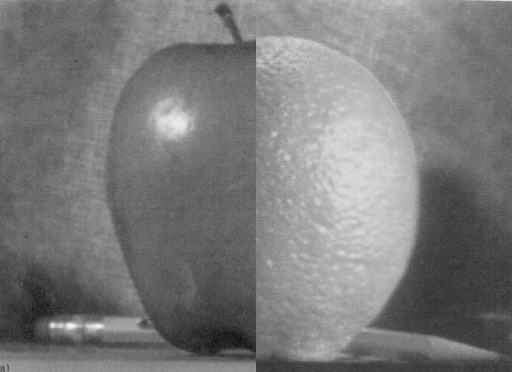

In [26]:
# Entre com seu código aqui
g = np.zeros(apple.shape)
g[:, :256] = apple[:, :256]
g[:, 256:] = orange[:, 256:]
g = g[70:442, :]
display_image(g, "mesclagem das imagens sem o blend")

<p> <strong> Resp.: </strong> Entre com sua resposta aqui </p>

<p>
    <strong>12) </strong> Realize o blend das imagens "images/blend/hand_512.png" (utilize como $f$), "images/blend/eyes_512.png" (utilize como $g$) utilizando a imagem em "images/blend/mask_512.png"  como mascara.
    

In [29]:
# Entre com seu código aqui
mask = read_gray_image("images/blend/mask_512.png")
hand = read_gray_image("images/blend/hand_512.png")
eyes = read_gray_image("images/blend/eye_512.png")
print(mask.shape)

(512, 512)
